In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics
!pip install roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6634.3/8062.4 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="nXRFu1swQzbMlfRMolSH")
project = rf.workspace("nipada").project("sign-language-english")
version = project.version(20)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-(English)-20 in yolov11:: 100%|██████████| 26306/26306 [00:03<00:00, 6895.20it/s] 


In [5]:
import yaml

yaml_path = "/kaggle/working/Sign-Language-(English)-20/data.yaml"   

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)

data["path"] = "/kaggle/working/Sign-Language-(English)-20"

# optional but recommended
data["train"] = "/kaggle/working/Sign-Language-(English)-20/train/images"
data["val"] = "/kaggle/working/Sign-Language-(English)-20/valid/images"
data["test"]= "/kaggle/working/Sign-Language-(English)-20/test/images"

with open(yaml_path, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("YAML updated for Kaggle ✅")

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 20, 'names': ['Do', 'Fine', 'Good', 'Good_luck', 'Hello', 'Home', 'How_much', 'I', 'Like', 'Love', 'Miss', 'Name', 'Nevermind', 'Sad', 'Sick', 'Sorry', 'Talk', 'Thank_you', 'What', 'You'], 'roboflow': {'workspace': 'nipada', 'project': 'sign-language-english', 'version': 20, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/nipada/sign-language-english/dataset/20'}}
YAML updated for Kaggle ✅


In [11]:
!cat "/kaggle/working/Sign-Language-(English)-20/data.yaml"

train: /kaggle/working/Sign-Language-(English)-20/train/images
val: /kaggle/working/Sign-Language-(English)-20/valid/images
test: /kaggle/working/Sign-Language-(English)-20/test/images
nc: 20
names:
- Do
- Fine
- Good
- Good_luck
- Hello
- Home
- How_much
- I
- Like
- Love
- Miss
- Name
- Nevermind
- Sad
- Sick
- Sorry
- Talk
- Thank_you
- What
- You
roboflow:
  workspace: nipada
  project: sign-language-english
  version: 20
  license: CC BY 4.0
  url: https://universe.roboflow.com/nipada/sign-language-english/dataset/20
path: /kaggle/working/Sign-Language-(English)-20


In [13]:
!yolo task=detect mode=train data="/kaggle/working/Sign-Language-(English)-20/data.yaml" model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Sign-Language-(English)-20/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

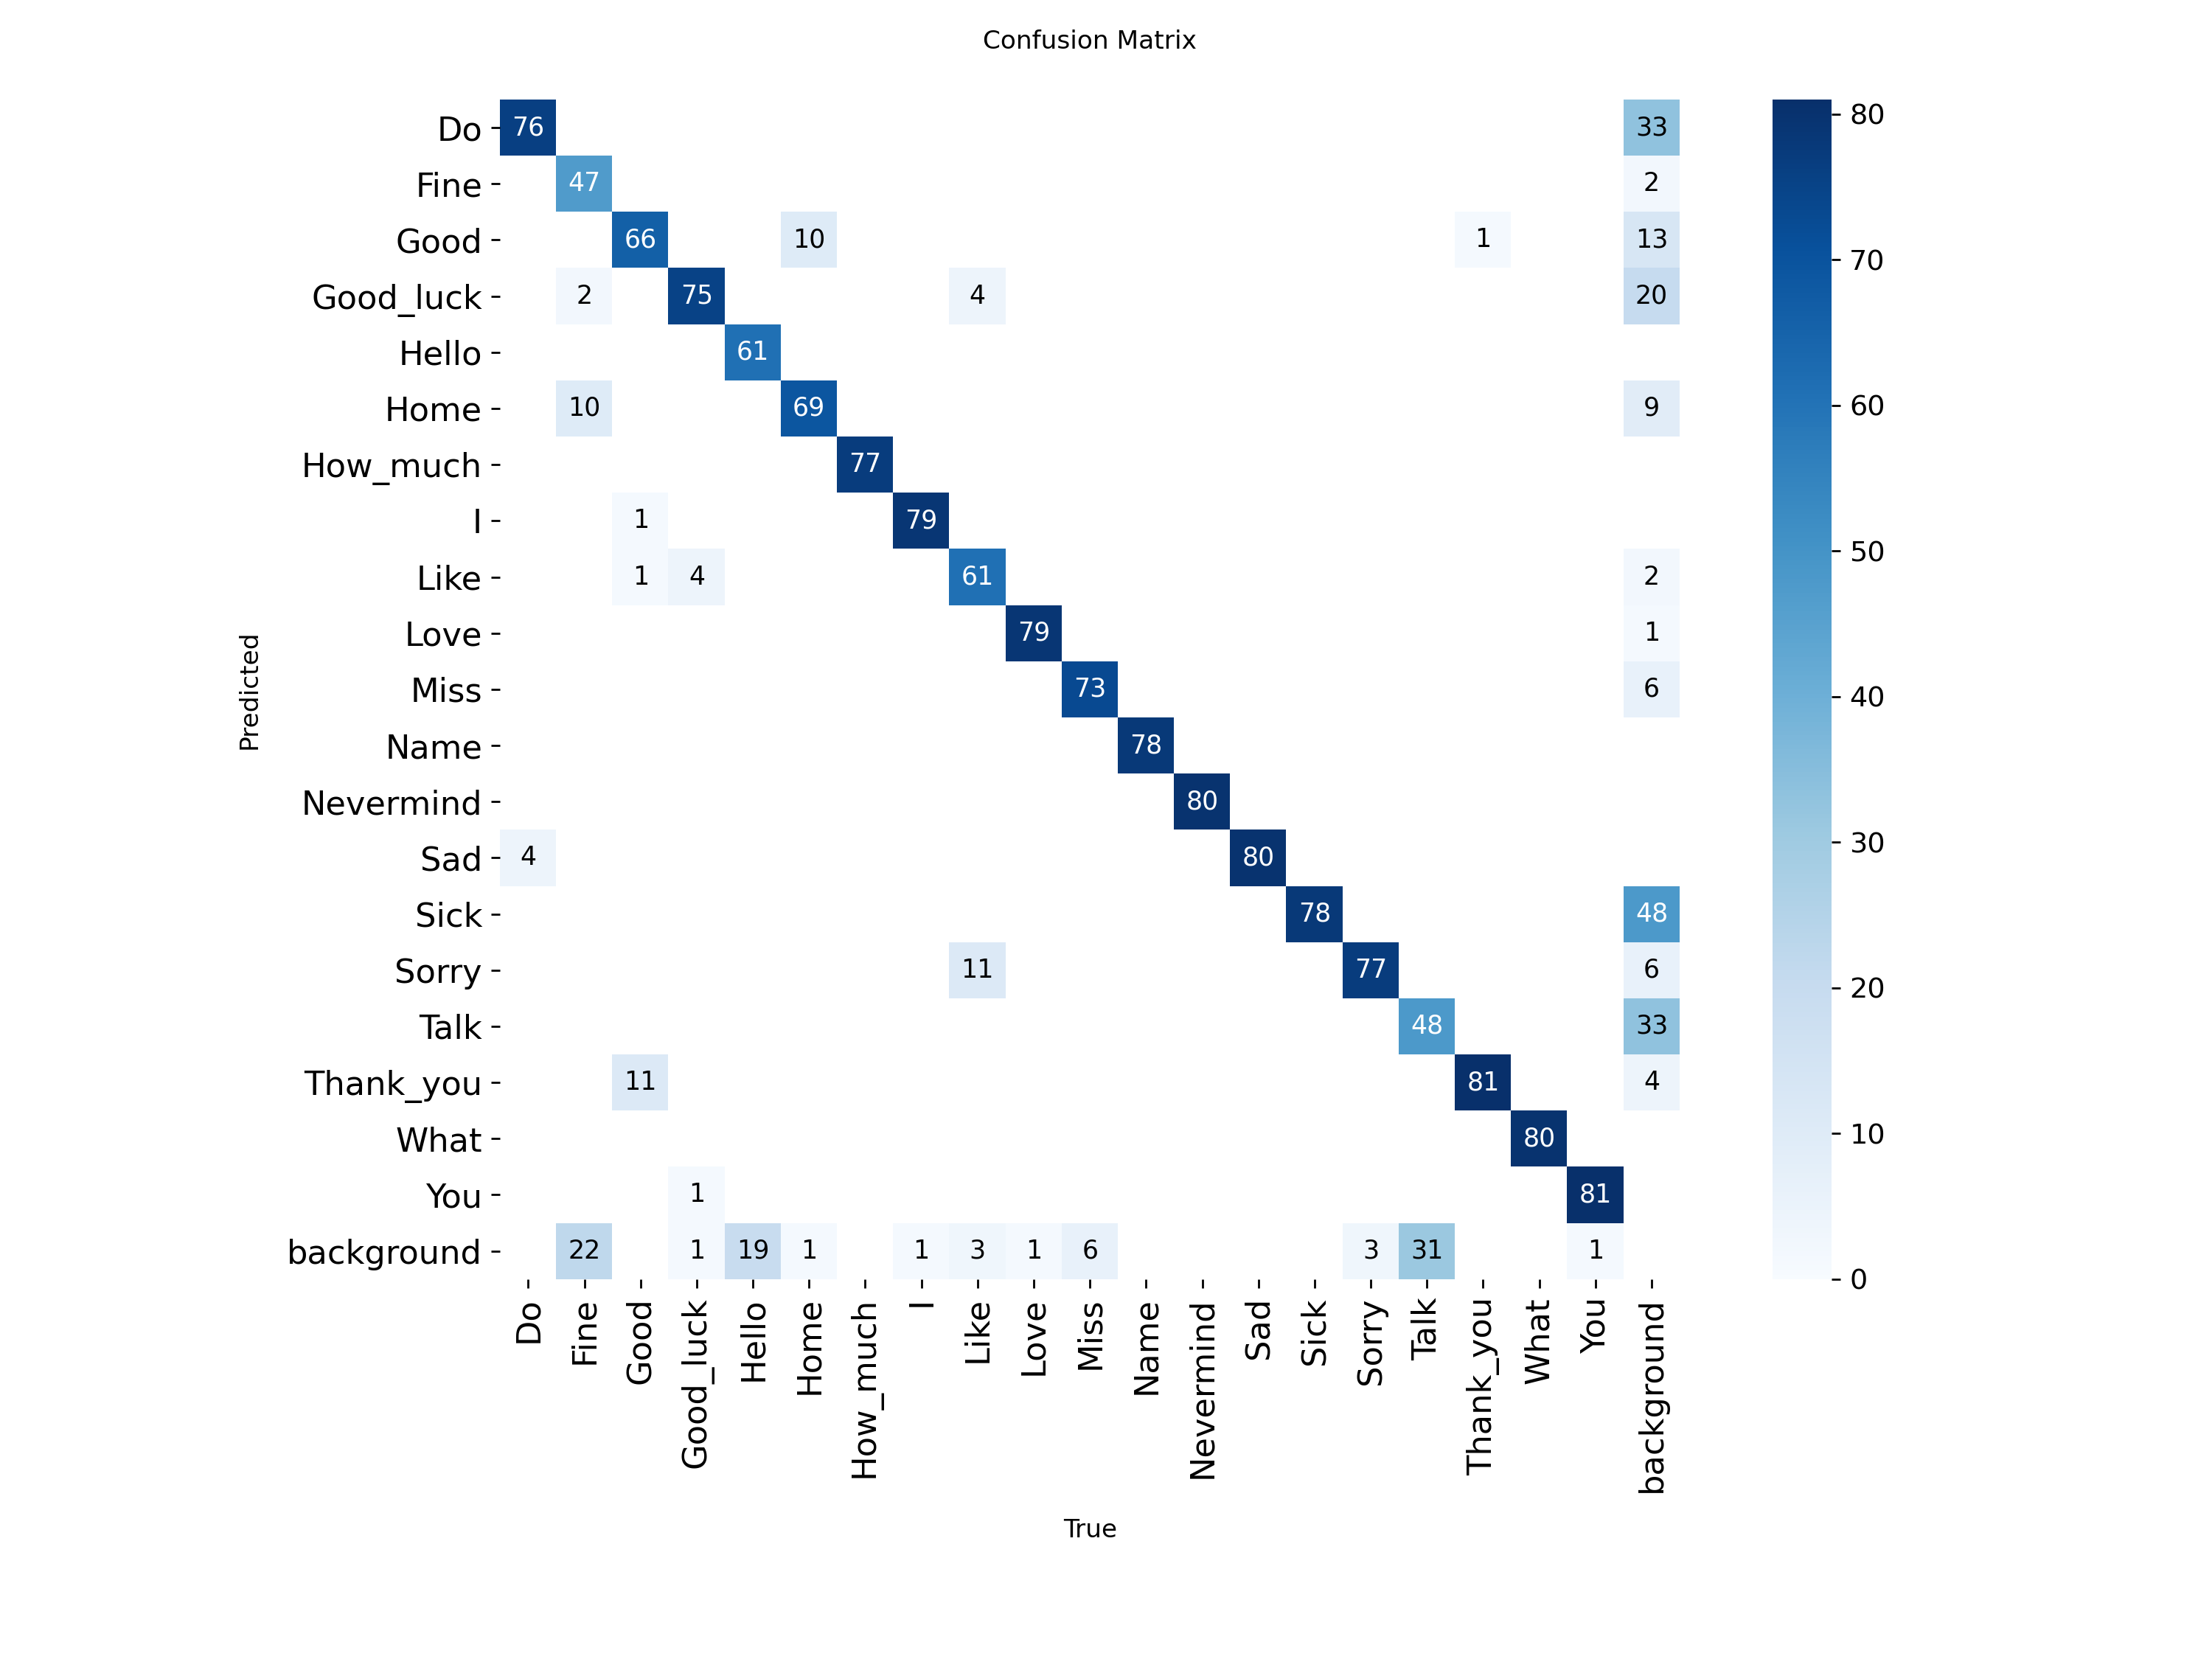

In [14]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

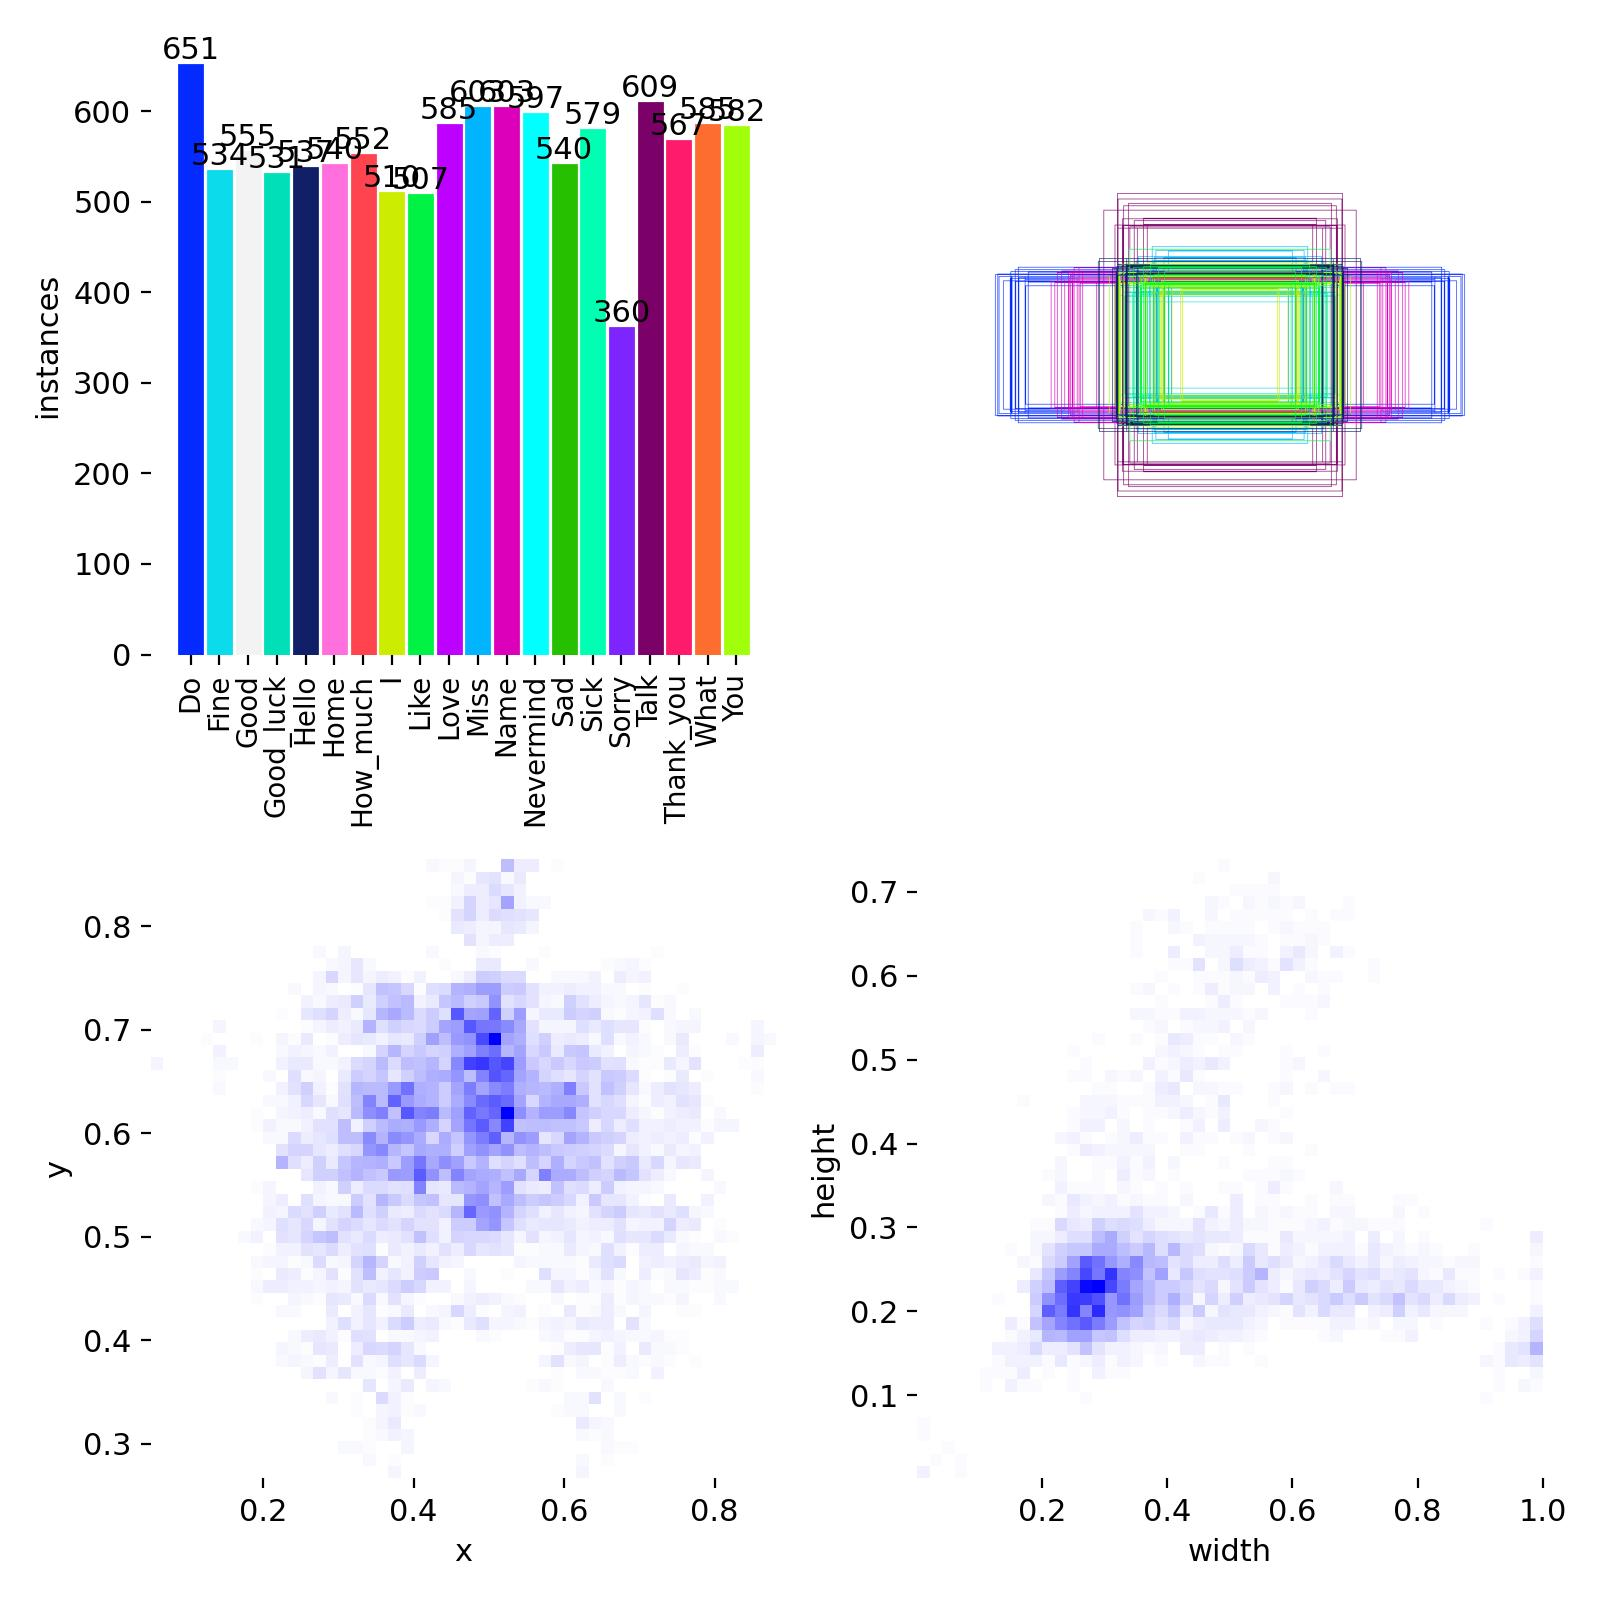

In [15]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

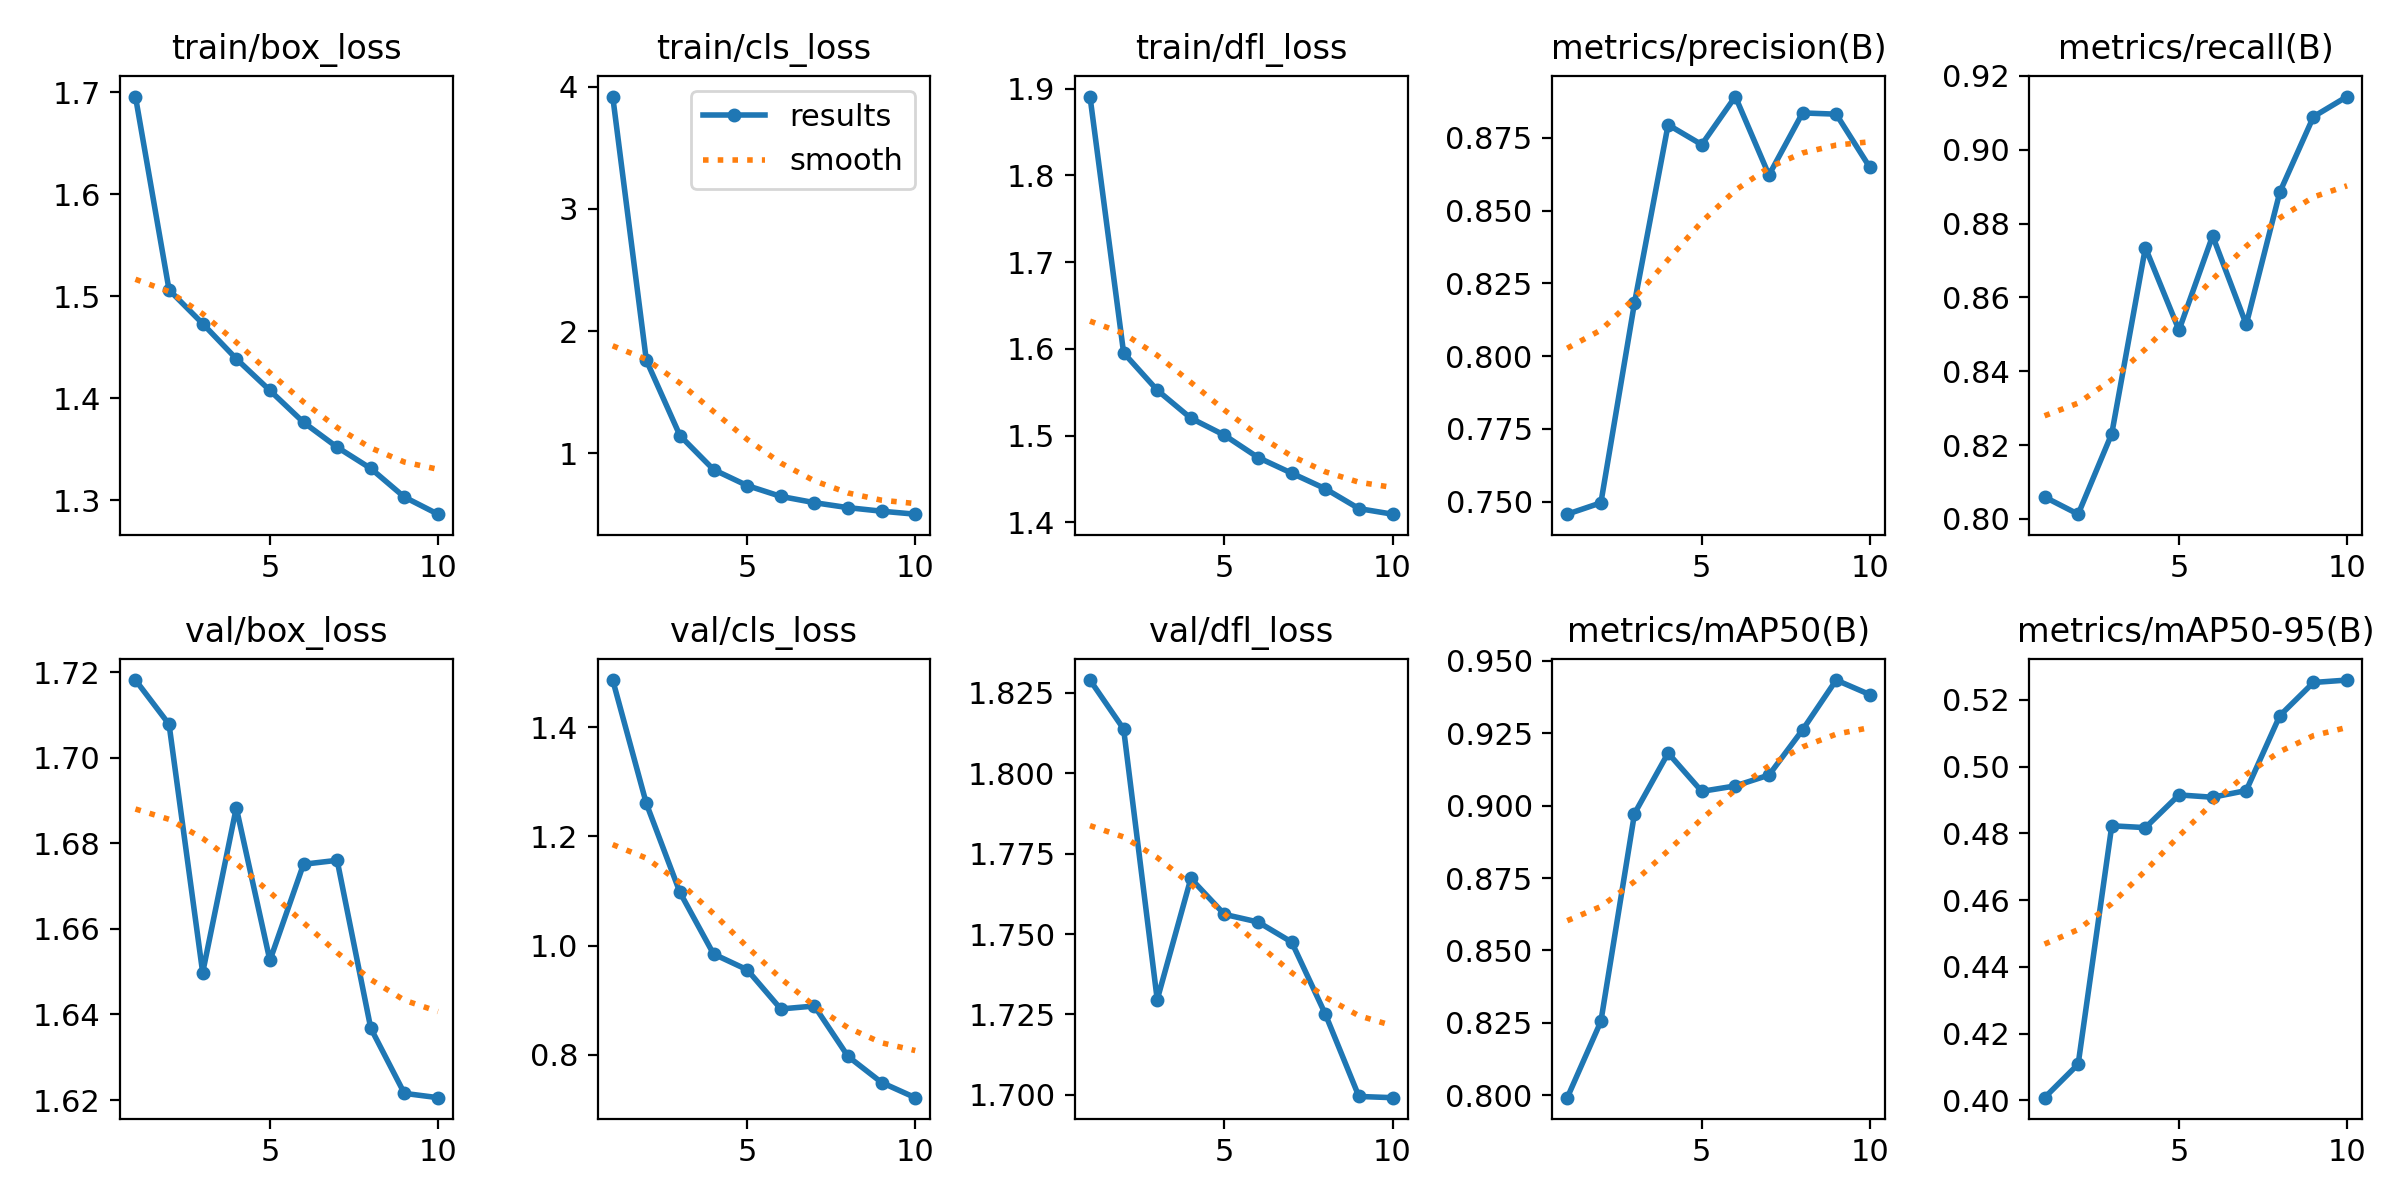

In [16]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

#validation

In [18]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data="/kaggle/working/Sign-Language-(English)-20/data.yaml"

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 101 layers, 2,586,052 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1828.2±569.0 MB/s, size: 57.6 KB)
val: Scanning /kaggle/working/Sign-Language-(English)-20/valid/labels.cache... 1591 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1591/1591 290.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 100/100 9.9it/s 10.1s.2s
                   all       1591       1595      0.865      0.914      0.938      0.526
                    Do         80         80      0.703      0.963      0.944      0.687
                  Fine         80         81          1      0.663      0.973      0.475
                  Good         79         79      0.732      0.886      0.925      0.471
             Good_luck         81         81      0.763      0.955      0.898      0.454


#test

In [21]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source= "/kaggle/working/Sign-Language-(English)-20/test/images" save=True

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 101 layers, 2,586,052 parameters, 0 gradients, 6.3 GFLOPs

image 1/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0178_JPG.rf.619a42e6cd5372d009456e46e8a1f365.jpg: 640x640 1 Thank_you, 9.4ms
image 2/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0599_jpg.rf.a2dae0035a439c089d42dd376b049de4.jpg: 640x640 1 Sick, 8.3ms
image 3/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0622_JPG.rf.e5e15cbc418c3b7f8823bc031c0ca3a6.jpg: 640x640 1 Sick, 7.4ms
image 4/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0657_JPG.rf.8e6423af32006bd0aeb206a7f526ec00.jpg: 640x640 1 Sick, 8.1ms
image 5/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0658_JPG.rf.1f32379842b7aee995d42e31d92a22c1.jpg: 640x640 1 Sick, 7.1ms
image 6/582 /kaggle/working/Sign-Language-(English)-20/test/images/IMG_0659_JPG.rf.9bad7da659501fbd2155

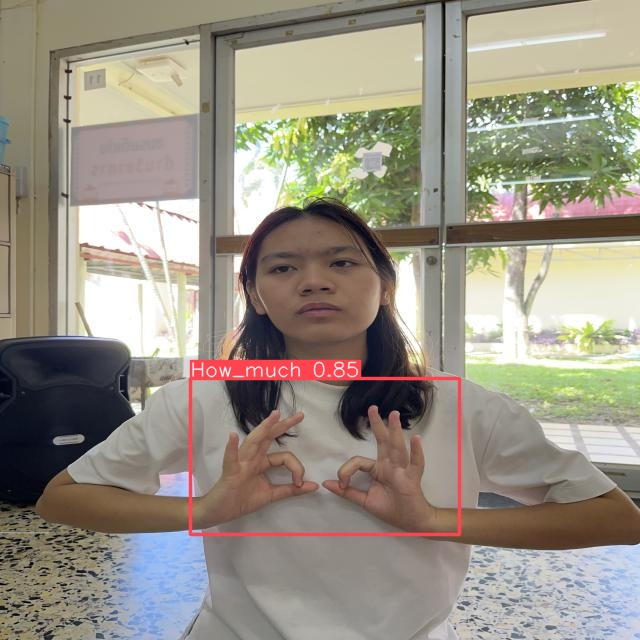

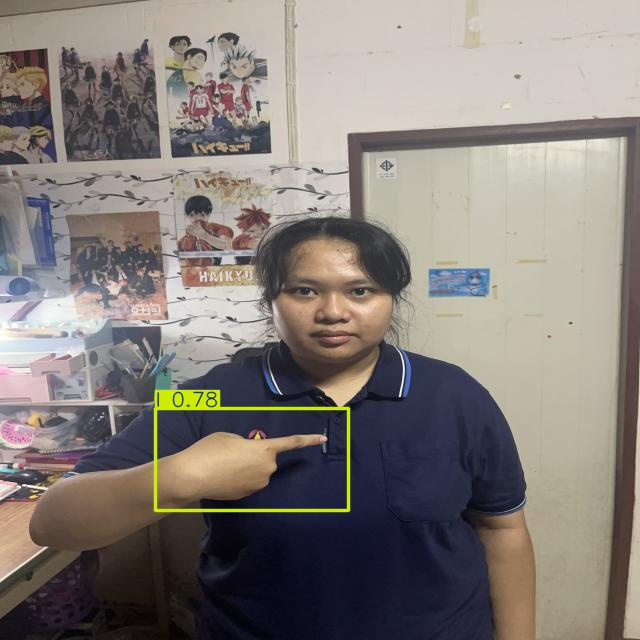

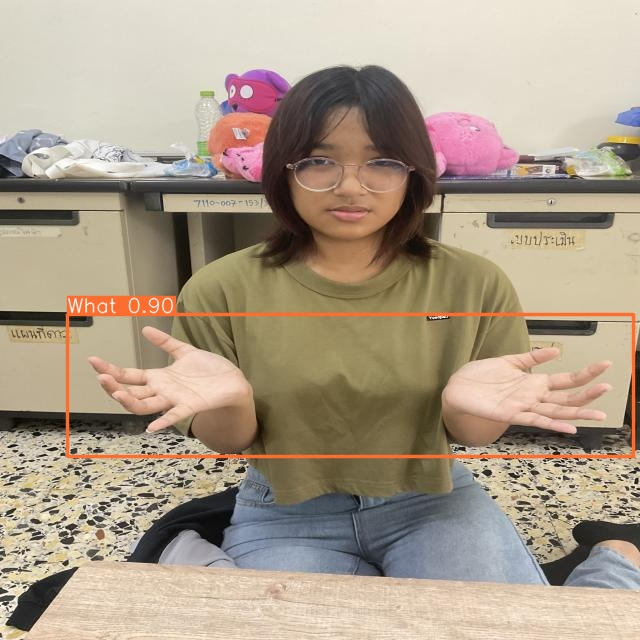

In [22]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")